In [186]:
# Importing Neccasary Library
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [2]:
# Read data From Ref Link....
link = "http://bit.ly/w-data"
df = pd.read_csv(link)
# We Read data 

In [4]:
# Check First 10 Head Data 
df.iloc[1:10]

,Hours,Scores
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
# Checking columns
print("Columns of data is :",df.columns)

# Checking the Shape of the data 
print("Shape of the data is :",df.shape)

# Description of the data 
df.describe()

Columns of data is : Index(['Hours', 'Scores'], dtype='object')
Shape of the data is : (25, 2)


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


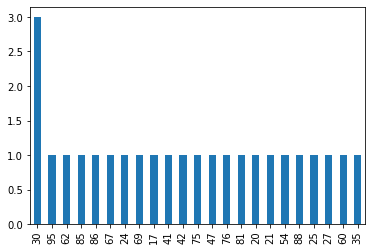

In [6]:
# Univariate Analysis: Scores
df['Scores'].value_counts().plot.bar()
# Try Univariate Analysis

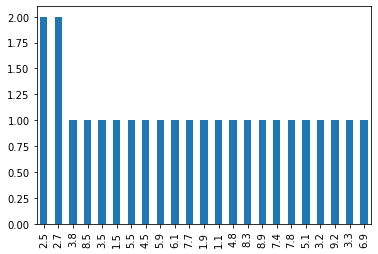

In [7]:
df['Hours'].value_counts().plot.bar()

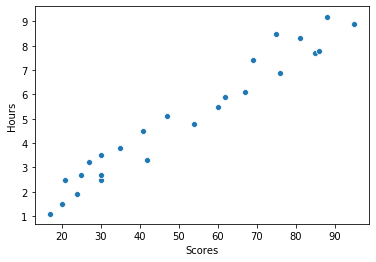

In [8]:
# Bivariate Analysis
ax = sns.scatterplot(x="Scores", y="Hours",
                     data=df)
# Then Bivariate Analysis

In [9]:
# Has there Any Correlation In It ?
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [10]:
# Following the regression equation, our dependent variable (y) is the Hours
y = df['Scores']
# Similarly, our independent variable (x) is the score
x1 = df['Hours']

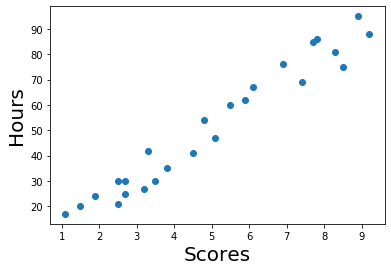

In [11]:
# Plot a scatter plot (first we put the horizontal axis, then the vertical axis)
plt.scatter(x1,y)
# Name the axes
plt.xlabel('Scores', fontsize = 20)
plt.ylabel('Hours', fontsize = 20)
# Show the plot
plt.show()

In [13]:
 import statsmodels.api as sm

In [14]:
# Add a constant. Essentially, we are adding a new column (equal in lenght to x), which consists only of 1s
x = sm.add_constant(x1)
# Fit the model, according to the OLS (ordinary least squares) method with a dependent variable y and an idependent x
results = sm.OLS(y,x).fit()
# Print a nice summary of the regression. That's one of the strong points of statsmodels -> the summaries
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Sun, 19 Jul 2020   Prob (F-statistic):           9.13e-17
Time:                        21:32:12   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4837      2.532      0.981      0.337      -2.753       7.721
Hours          9.7758      0.453     21.583      0.000       8.839      10.713
==============================================================================
Omnibus:                        7.616   Durbin-Watson:                   1.460
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                2.137
Skew:                          -0.216   Prob(JB):                        0.343
Kurtosis:                       1.634   Cond. No.                         13.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# It gives a Good R-Squared 

In [113]:
# Now try Linear-Regression with Sklearn 

In [168]:
# Again Collecting data to feed into Model and Reshape also to Make Regression Understable
X = df['Hours'].values.reshape(-1,1)
y = df['Scores'].values.reshape(-1,1)

In [169]:
# Splitting Up data -----
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.3,random_state=101)
# Then Checking The Shape
X_train.shape,y_train.shape,y_test.shape,X_test.shape   

((17, 1), (17, 1), (8, 1), (8, 1))

In [170]:
# Try sklearn
from sklearn.linear_model import LinearRegression

In [171]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [172]:
model.intercept_

array([2.10249307])

In [173]:
# Plotting the regression line
line = model.coef_*X+model.intercept_

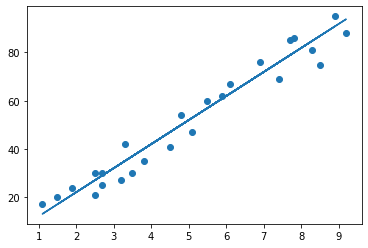

In [174]:
#To check whether the model is fit or not
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [175]:
# Let Make Prediction 
ypred=model.predict(X_test)
ypred

array([[27.01878177],
       [78.84466226],
       [39.97525189],
       [75.85470762],
       [56.91832821],
       [49.94176737],
       [33.99534261],
       [86.81787465]])

In [176]:
# Comparing Actual vs Predicted
df1= pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': ypred.flatten()})  
df1 

,Actual,Predicted
0,30,27.018782
1,85,78.844662
2,35,39.975252
3,69,75.854708
4,60,56.918328
5,54,49.941767
6,27,33.995343
7,75,86.817875


In [193]:
# Then Last I try To make Prediction Based on My Model
val=float(input("Enter the No of Hours"))
print('Predicted Percentage Score ',model.predict([[val]])[0][0])

# We see Different No.of Hours Predict Different O/p


Enter the No of Hours 9.25


Predicted Percentage Score  94.29276125536512


In [194]:
# Now it Time to validate your model with rmse
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ypred)))
# Rmse is under 10

RMSE: 6.452508476982333
